## Exploratory Data Analysis Stage One: App Performance Overview
Stage one of our exploratory data analysis aims to expose patterns and yield insight into the nature and intensity of the customer experience within the IOS app user community. 

### The Dataset
The dataset contains the following product descriptive, rating, price, and developer data for some 475,132 apps from the App Store. 

| #  | Variable                | Date Type  | Description                                |
|----|-------------------------|------------|--------------------------------------------|
| 1  | id                      | Nominal    | App Id from the App Store                  |
| 2  | name                    | Nominal    | App Name                                   |
| 3  | description             | Nominal    | App Description                            |
| 4  | category_id             | Nominal | Numeric category identifier                |
| 5  | category                | Nominal    | Category name                              |
| 6  | price                   | Continuous | App Price                                  |
| 7  | developer_id            | Nominal    | Identifier for the developer               |
| 8  | developer               | Nominal    | Name of the developer                      |
| 9  | rating                  | Ordinal   | Average user rating since first released   |
| 10 | ratings                 | Discrete   | Number of ratings since first release      |
| 11 | released                | Continuous   | Datetime of first release                  |

### EDA Approach
Our exploration will comprise the following five analyses.

1. Structural Analysis: Examine the overall shape, structure, and type of the data.
2. Data Quality Analysis: Assess quality and suitability of the data in terms of missing values, outliers, duplication, cardinality, and feature values.
3. Univariate Analysis: Explore the distributions of rating count, average rating, categories, and price.
4. Bivariate Analysis: Evaluate ratings, rating count, reviews and correlation analysis between two variables.    
5. Multivariate Analysis: Cluster, factor, and correspondence analysis of three or more variables simultaneously.
6. Conclusions, insights and questions for stage two.


**Import Python Libraries and Provision Dependencies**

In [1]:
import os

import numpy as np
import pandas as pd
from IPython.display import HTML, display_html
import warnings
import seaborn as sns
warnings.filterwarnings(action='ignore', category=UserWarning)

import d8analysis as eda
from appstore.container import AppstoreContainer
from appstore.data.dataset.appdata import AppDataDataset

In [2]:
container = AppstoreContainer()
container.init_resources()
container.wire(packages=['appstore'])


**Obtain the Dataset**

In [3]:
repo = container.data.appdata_repo()
dataset = repo.get_dataset()

### Structural Analysis
The structure and characteristics of the AppData dataset are as follows:

In [4]:
df1 = dataset.overview
df2 = dataset.dtypes

df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:220px;'").set_caption("Dataset Structure")
df2_style = df2.style.set_table_attributes("style='display:inline; margin-right:120px'").set_caption("Dataset Data Types")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Characteristic,Total
0,Number of Observations,475132
1,Number of Variables,11
2,Number of Cells,5226452
3,Size (Bytes),962579922
,Data Type,Count
0,string,5
1,float64,2
2,category,1
3,category,1
4,int64,1


As indicated above, we have approximately 475,000 apps in our dataset, described by 11 features. Let's take a quick look.

In [5]:
dataset.sample().style.hide(axis="index")

Id,Name,Description,Category_id,Category,Price,Developer_id,Developer,Rating,Ratings,Released
6444181331,Steak Cooking & Food Cutting,"Play this amazing Slice, chop, and dice roll food cutting ASMR in this satisfying cooking game. The more you roll, the happier your customers will be! The most satisfying soap cutting relaxing game. Cut some amazing food soaps yourself! Cut different types of soaps, and feel the amazing relaxing satisfaction. Many types of soaps are available to cut! Carve it into amazing good looking shapes. Feel the immense satisfaction experience! Sharpen your knife cutting skills on all sorts of dishes. But the cooking food fun doesn’t stop there! You can keep unlocking new actions of features as you advance to add tons of new mini-games to your game play experience. If you have a COOKING making habit or you are foodie then sharpen your knife skills to cut meat for steak dishes :cut_of_meat: and amazing BBQ dishes!",6014,Games,0.000000,1641330966,Shafia Javed,0.000000,0,2023-01-09 08:00:00
6444602459,GVG STORE,"Introduce Korean fashion to the whole world. Meet various Korean casual street brands and up-and-coming designer fashion brands through the GVG app. Check out Korean culture that the world is paying attention to, especially trend fashion items. GVG store supports 11 languages and 23 currencies and is a global shopping platform that can be delivered directly to users in each country. [Benefits] ■ Take 15% Off Your First Order Download the discount coupon from the app. ■ Discounts on overseas shipping charges Do you think shipping is expensive? If you buy it through the app, we will give you a discount on the shipping fee. ■ Next Purchase Discount Coupon Presented Hoping to see you next time. We will issue you a discount coupon for your next purchase. [Enjoying the GVG store] ■ MD Recommended Daily Styling Proposal OOTD is not hard! Check out the coordination items recommended by MDs. ■ Meet idol fashion, airport outfit. You can check out the fashion items of idols that global K-pop fans are enthusiastic about. Of course, it's genuine. ■ Check the lookbooks of brands. Let’s enjoy the season trend with the lookbook of the recently released new items. Download the GVG app today! If you have any questions about shopping in the GVG store, please contact us at the following email address. gvg.worldwide@gmail.com",6024,Shopping,0.000000,1655615056,PlanBee Commerce,5.000000,2,2023-03-09 08:00:00
827104452,Complex Map,Complex Map visualizes functions of a complex variable by transforming an image mapped to the complex plane. Features: * complex function parser that handles all standard functions and constants * chose a base image from a set of predefined images or import your own images from your photo library * export the resulting image back to your library or share it with others,6017,Education,0.000000,505803809,TinkaTinka,5.000000,3,2014-03-12 19:56:00
904275738,Fleet Battle: Sea Battle game,"Fleet Battle brings the classic board game Sea Battle to your smartphone or tablet. The game offers everything that made the classic so popular. Defeat ship after ship and rise through the ranks - from Seaman Recruit up to Admiral of the Navy. Pit yourself against the computer or your friends and prove you have the makings of a real Fleet Commander. Sink the enemy fleet and be victorious! Looking for a fun, beautiful, fast-paced naval combat game? Look no further! GAME MODES Online Quick Match PVP - 24 hours instant multiplayer worldwide - Compete on leaderboards - Text chat with integrated translator Play with Friends PVP - Play with friends and family and chat online – now with lobby chat! - Play local over WiFi - Play hotseated - Play with custom rules Offline Single-Player - Compete on leaderboards - Play with custom rules Leaderboards and medals - Compete against the whole world - NEW: same chances for everyone: maximum of 200 weekly rated games! - Weekly/Monthly/All Time - HALL OF CHAMPIONS - Earn cool medals C

Identity variables, specifically (app) id and developer_id will be retained for data processing purposes, but have no other value and will be largely ignored during this analysis. 

### Data Quality Analysis
Data type, cardinality, validity, duplication, and size data are summarized at the variable level. 

In [6]:
dataset.info.style.hide(axis="index")


Column,Datatype,Valid,Null,Validity,Cardinality,Percent unique,Size
id,string,475132,0,1.000000,475132,1.000000,31748470
name,string,475132,0,1.000000,474250,1.000000,40449624
description,string,475132,0,1.000000,463635,0.980000,1186227495
category_id,category,475132,0,1.000000,26,0.000000,477790
category,category,475132,0,1.000000,26,0.000000,477944
price,float64,475132,0,1.000000,125,0.000000,3801056
developer_id,string,475132,0,1.000000,265367,0.560000,31666555
developer,string,475132,0,1.000000,264402,0.560000,37093493
rating,float64,475132,0,1.000000,44083,0.090000,3801056
ratings,int64,475132,0,1.000000,14531,0.030000,3801056


**Observations**
- With the exception of released (date), we have no missing values. 
- Id's are unique and name, description, developer information, are all high-cardinality
- Category id and label are low-cardinality with 26 unique values, each. 

#### Numeric Variable Data Quality
Each feature has been cast to an appropriate data type and missing data are not extant for the dataset. Valid values for the numeric variables are:

| Variable                | Date Type  | Valid Values                                    |
|-------------------------|------------|-------------------------------------------------|
| price                   | Continuous | Non negative values                             |
| rating                  | Interval   | Real valued in [0,5]                            |
| ratings                 | Discrete   | Discrete and non-negative                       |
| released                | Continuous | Datetimes between June 10, 2008 and present day. |

Let's check the ranges for these variables.

In [7]:
stats = dataset.describe(include=[np.number, np.datetime64])
stats.numeric[['min','max']]

,min,max
price,0.00,999.99
rating,0.00,5.00
ratings,0.00,"30,835,421.00"


All numeric and datetime values are within range.

#### Categorical Variable Data Quality

The id, name, description, developer_id, and developer variables are nominal, high cardinality strings. Category and category_id; in contrast, must contain one of 26 category id / category values selected for this analysis.  

In [8]:
columns = ['category_id', 'category']
dataset.unique(columns=columns).style.hide(axis="index")

Category_id,Category
6013,Health & Fitness
6017,Education
6000,Business
6012,Lifestyle
6004,Sports
6014,Games
6007,Productivity
6002,Utilities
6027,Graphics & Design
6010,Navigation


Category and category_id values are as expected. 



### Univariate Analysis
#### Quantitative Data
We'll begin the univariate analysis with an examination of the quantitative variables, namely:
- Average User Rating
- Rating Count
- Price
- Release Date

Using quantitative and qualititative methods, we'll discover the central tendency of the data (arithmetic mean, median, mode), its spread (variance, standard deviation, interquartile range, maximum and minimum value) and some features of its distribution (skewness, kurtosis). 

##### Average User Rating

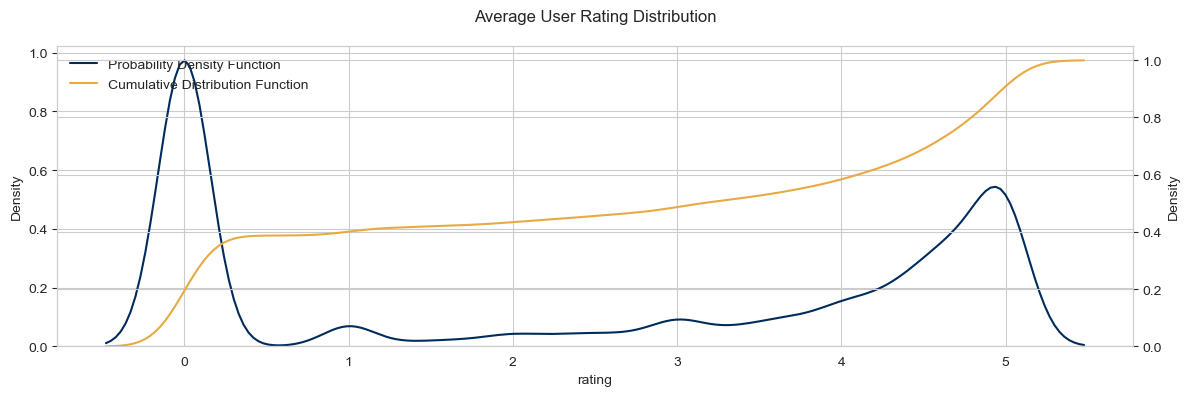

In [9]:
dataset.plot.pdfcdfplot(x='rating', title='Average User Rating Distribution')



 Since the rating scale is in [1,5], its clear that the probability density and histogram above contain apps that have not been rated. To get a sense of the actual ratings, we'll create a new dataset without the non-reviewed apps.

In [10]:
df = dataset.as_df()
df = df.loc[df['rating'] != 0]
rated = AppDataDataset(df=df)

Ok, let's examine the frequency distribution of the ratings.

,Count,Proportion,Cumulative
rating,,,
"(0.995, 2.0]","24,025.00",0.08,0.08
"(2.0, 3.0]","28,283.00",0.10,0.18
"(3.0, 4.0]","44,853.00",0.15,0.33
"(4.0, 5.0]","193,716.00",0.67,1.00
Total,"290,877.00",1.00,


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
rating,"290,877.00",4.09,1.09,1.00,3.67,4.53,4.98,5.00,-1.43,1.16


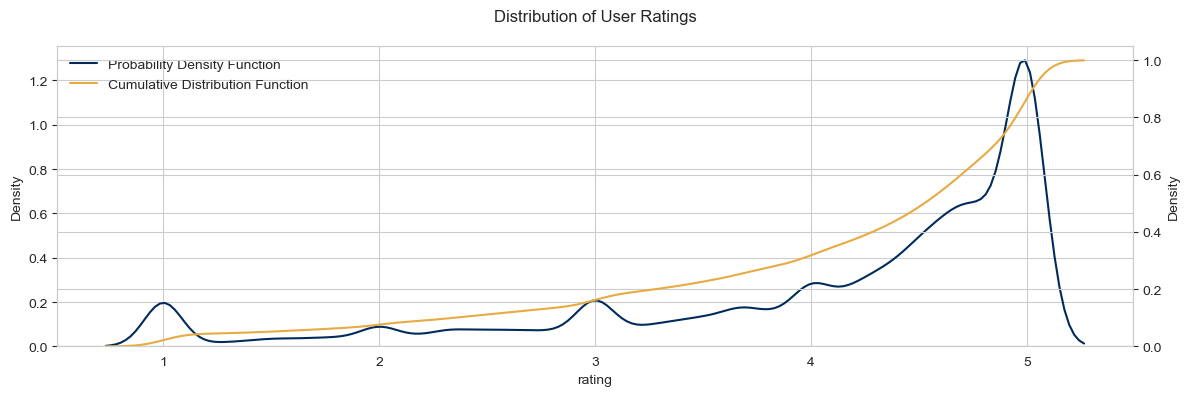

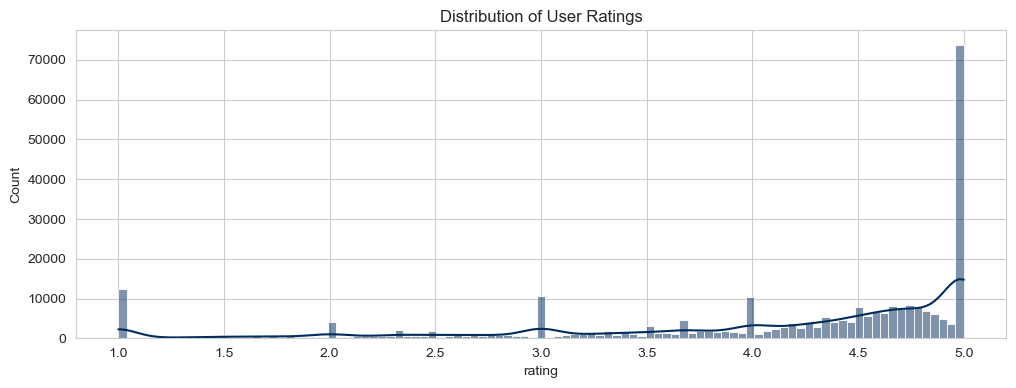

In [11]:
rated.frequency(x='rating', bins=4)
stats = rated.describe(x='rating')
stats.numeric
rated.plot.pdfcdfplot(x='rating', bins=4, title='Distribution of User Ratings')
rated.plot.histpdfplot(x='rating', title='Distribution of User Ratings')

**Key Observations:**
- The long left tail reveals a tendency towards ratings in the 4-5 star range. 
- Five star ratings make up 67% of all ratings. 
- Multiple peaks are also observed at one star and three star ratings and to a lesser degree with two stars. 
- Ratings up to one, two, and three stars, correspond to approximately 8%, 20% and 33% of the cumulative ratings respectively.
- There is no assumption of normality in the distribution of ratings.
- In short, five star ratings dominate customer opinion at this level by a significant margin.
- Note: Taking the average of ordinal values, such as user ratings, is not among the *permissible* statistical transformations whose meanings are preserved when applied to the data, according to measurement theorists, most notably, Harvard psychologist S.S Stevens, who coined the terms *nominal*, *ordinal*, *interval*, and *ratio*. Fortunately, permission is not required in data analysis

##### Rating Count
Rating count can be a harbinger of the intensity of opinion. We'll use the same rated dataset as above. 

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
ratings,"290,877.00","4,455.63","135,804.01",1.00,2.00,10.00,73.00,"30,835,421.00",120.47,"20,613.88"


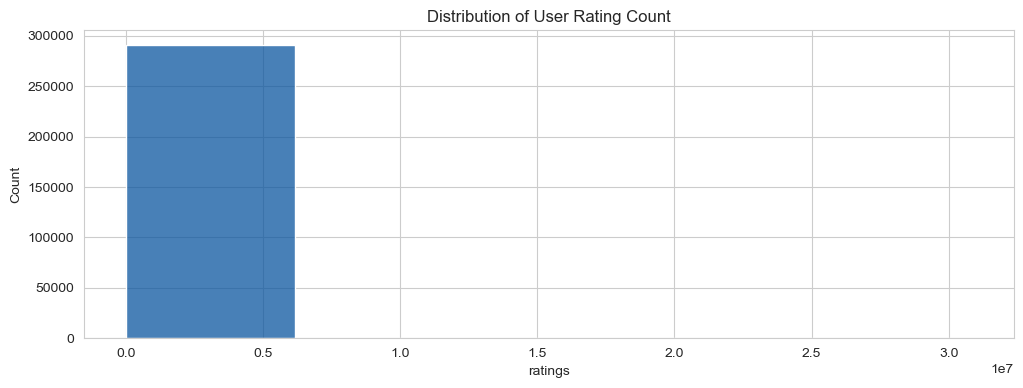

In [12]:
stats = rated.describe(x='ratings')
stats.numeric
rated.plot.histogram(x='ratings',bins=5, title='Distribution of User Rating Count')

In [13]:
rated.top_n(x='ratings', n=10)

,id,name,description,category_id,category,price,developer_id,developer,rating,ratings,released
388004,544007664,"YouTube: Watch, Listen, Stream",Get the official YouTube app on iPhones and iP...,6008,Photo & Video,0.00,281956209,Google LLC,4.68,30835421,2012-09-11 07:23:00
316943,324684580,Spotify - Music and Podcasts,"With the Spotify music and podcast app, you ca...",6011,Music,0.00,324684583,Spotify,4.79,26330932,2011-07-14 11:22:00
388003,389801252,Instagram,Bringing you closer to the people and things y...,6008,Photo & Video,0.00,389801255,"Instagram, Inc.",4.73,24714167,2010-10-06 08:12:00
304061,719972451,DoorDash - Food Delivery,Delivery anywhere you are. DoorDash offers the...,6023,Food & Drink,0.00,719972454,"DoorDash, Inc.",4.77,16175196,2013-10-10 19:46:00
461894,351727428,Venmo,"Venmo is the fast, safe, social way to pay and...",6015,Finance,0.00,351727431,Venmo,4.86,15352766,2010-04-03 05:41:00
388007,835599320,TikTok,TikTok is THE destination for mobile videos. O...,6016,Entertainment,0.00,1322881000,TikTok Ltd.,4.76,14742979,2014-04-02 22:44:00
445511,529379082,Lyft,Get where you’re going with Lyft. Whether you...,6003,Travel,0.00,523004506,"Lyft, Inc.",4.91,12634294,2012-05-31 00:43:00
461891,310633997,WhatsApp Messenger,WhatsApp from Meta is a FREE messaging and vid...,6005,Social Networking,0.00,310634000,WhatsApp Inc.,4.70,11785087,2009-05-04 02:43:00
316944,284035177,Pandora: Music & Podcasts,"Create stations from your favorite songs, arti...",6011,Music,0.00,284035180,"Pandora Media, LLC",4.79,9472664,2019-02-01 08:00:00
265482,431946152,Roblox,Roblox is the ultimate virtual universe that l...,6014,Games,0.00,431946155,Roblox Corporation,4.53,9323618,2011-05-26 20:51:00


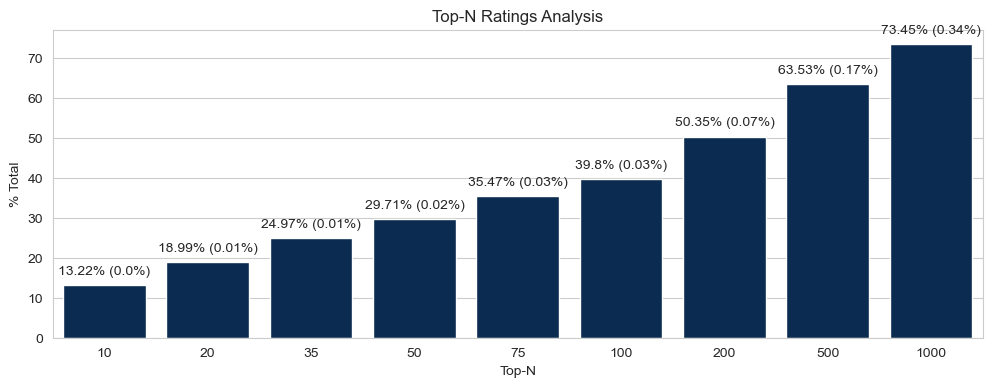

In [14]:
topn = np.array([10,20,35,50,75,100,200,500,1000])
rated.plot.topn_plot(x='ratings', n=topn)

**Key Observations:**
- The distribution of rating counts has a long right tail, with a range from 1 to nearly 31 m ratings. 
- The central tendency is placed at a median of 10 ratings per app. The average is pulled in the direction of the outliers and is about 4.5k ratings.
- Giants of big-tech, social-media, an e-commerce, such as YouTube, Tik-Tok, Spotify, WhatsApp and DoorDash are among the most rated apps in the App Store.
- The top-10 most-rated apps account for nearly 14% of all ratings and less than 1/10th of a percent of all apps. Still, the most-rated 1000 apps, which represent 1/3rd of one percent of all apps, consume nearly 75% of all ratings. 
- Takeaway: Rating counts are vastly disproportionate.
- Note: Apps with earlier release dates may have higher rating counts. Ratings per day since release will remove the temporal dimension from the rating counts. 

In [15]:
with pd.option_context('format.precision',2):
    df1_style = freq.style.set_table_attributes("style='display:inline; margin-right:220px;'").set_caption("Average User Rating Frequency Distribution")
    df2_style = desc.style.set_table_attributes("style='display:inline; margin-right:120px'").set_caption("Average User Rating Descriptive Statistics")
    display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

NameError: name 'freq' is not defined

**Key Observations**
- The five-star ratings represent 67% of nearly 291,000 ratings in the dataset. 
- Ratings up to four-star comprise just 33% of all ratings. Three stars and below make up approximately 20% of the data; whereas, one and two star ratings represent less than 10% of all ratings.
- The mean of average user ratings, 4.09 stars, is influenced by the significant left skew. The median of 4.53 is a more robust measure of centrality, given the long left-tail in the distribution.
- The assumption of a normal distribution is violated as shown in the histogram, and the probability density functions.

#### Ratings
Next, we explore the distribution of rating counts in the dataset.

In [ ]:
p = eda.KDEPlot(data=df_ratings, x='ratings', title="Rating Count\nProbability Density Function")
h = eda.Histogram(data=df_ratings, x='ratings', title="Rating Count\nHistogram")
c = eda.ECDFPlot(data=df_ratings, x='ratings', title="Rating Count\nCumulative Distribution Function")
v = eda.ViolinPlot(data=df_ratings,x='ratings', title="Rating Count Distribution")
plots = [p]

visual = Visual()
for plot in plots:
    visual.add_plot(plot=plot)
visual.visualize()